# Testing the model

Using your solution so far, test the model on new data.

The new data is located in the ‘Bank_data_testing.csv’.

Good luck!

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load the data

Load the ‘Bank_data.csv’ dataset.

In [2]:
data = pd.read_csv('Bank-data.csv')
data

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4,4.856,0.0,1.0,0.0,0.0,157.0,no
...,...,...,...,...,...,...,...,...
513,513,1.334,0.0,1.0,0.0,0.0,204.0,no
514,514,0.861,0.0,0.0,2.0,1.0,806.0,yes
515,515,0.879,0.0,0.0,0.0,0.0,290.0,no
516,516,0.877,0.0,0.0,5.0,1.0,473.0,yes


In [3]:
data['y'] = data['y'].map({'yes':1,'no':0})

In [4]:
data.describe()

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000
mean,258.500000,2.835776,0.034749,0.266409,0.388031,0.127413,382.177606,0.500000
std,149.677988,1.876903,0.183321,0.442508,0.814527,0.333758,344.295990,0.500483
min,0.000000,0.635000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000
25%,129.250000,1.042750,0.000000,0.000000,0.000000,0.000000,155.000000,0.000000
50%,258.500000,1.466000,0.000000,0.000000,0.000000,0.000000,266.500000,0.500000
75%,387.750000,4.956500,0.000000,1.000000,0.000000,0.000000,482.750000,1.000000
max,517.000000,4.970000,1.000000,1.000000,5.000000,1.000000,2653.000000,1.000000


### Declare the dependent and independent variables

Use 'duration' as the independet variable.

In [5]:
y = data['y']
x1 = data['duration']

### Simple Logistic Regression

Run the regression and graph the scatter plot.

In [6]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

# Get the regression summary
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Sun, 26 May 2024   Pseudo R-squ.:                  0.2121
Time:                        15:31:13   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

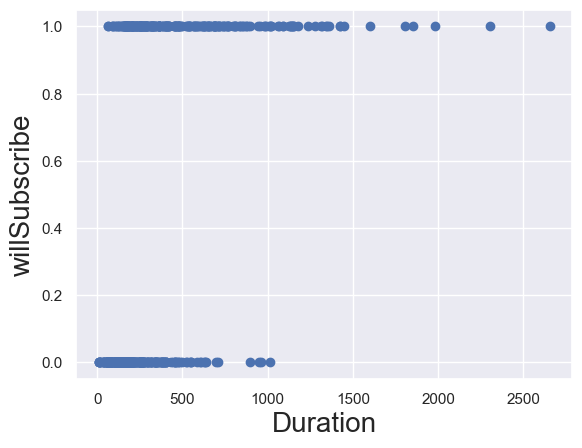

In [7]:
# Create a scatter plot of x1 (SAT, no constant) and y (Admitted)
plt.scatter(x1,y, color='C0')
# Don't forget to label your axes!
plt.xlabel('Duration', fontsize = 20)
plt.ylabel('willSubscribe', fontsize = 20)
plt.show()

## Expand the model

We can be omitting many causal factors in our simple logistic model, so we instead switch to a multivariate logistic regression model. Add the ‘interest_rate’, ‘march’, ‘credit’ and ‘previous’ estimators to our model and run the regression again. 

### Declare the independent variable(s)

In [8]:
# As variaveis sao lancadas na forma de array
estimators=['interest_rate','march','credit','previous','duration']

x2 = data[estimators]
y = data['y']

In [12]:
x = sm.add_constant(x2)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

# Get the regression summary
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.336664
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      512
Method:                           MLE   Df Model:                            5
Date:                Sun, 26 May 2024   Pseudo R-squ.:                  0.5143
Time:                        15:33:47   Log-Likelihood:                -174.39
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 1.211e-77
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0211      0.311     -0.068      0.946      -0.631       0.589
interest_rate    -0.8001      0.089     -8.943      0.000      -0.975      -0.625
march            -1.8322      0.330     -5.556      0.000      -2.478      -1.186
credit            2.3585      1.088      2.169      0.030       0.227       4.490
previous          1.5363      0.501      3.067      0.002       0.554       2.518
duration          0.0070      0.001      9.381      0.000       0.006       0.008
=================================================================================
"""

### Confusion Matrix

Find the confusion matrix of the model and estimate its accuracy. 

<i> For convenience we have already provided you with a function that finds the confusion matrix and the model accuracy.</i>

In [10]:
def confusion_matrix(data,actual_values,model):
        
        # Confusion matrix 
        
        # Parameters
        # ----------
        # data: data frame or array
            # data is a data frame formatted in the same way as your input data (without the actual values)
            # e.g. const, var1, var2, etc. Order is very important!
        # actual_values: data frame or array
            # These are the actual values from the test_data
            # In the case of a logistic regression, it should be a single column with 0s and 1s
            
        # model: a LogitResults object
            # this is the variable where you have the fitted model 
            # e.g. results_log in this course
        # ----------
        
        #Predict the values using the Logit model
        pred_values = model.predict(data)
        # Specify the bins 
        bins=np.array([0,0.5,1])
        # Create a histogram, where if values are between 0 and 0.5 tell will be considered 0
        # if they are between 0.5 and 1, they will be considered 1
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        # Calculate the accuracy
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
         #calculate the misclassification rate
        misclassification = (cm[1,0]+cm[0,1])/cm.sum()
        # Return the confusion matrix and 
        return cm, accuracy,misclassification

In [22]:
cm = confusion_matrix(x,y,results_log)
print('The confusion matrix is: ',cm[0])
print('The accuracy from trained data is: ',cm[1]*100, ' %')
print('The misclassification rate from trained data is: ',cm[2]*100, ' %')

The confusion matrix is:  [[218.  41.]
 [ 30. 229.]]
The accuracy from trained data is:  86.2934362934363  %
The misclassification rate from trained data is:  13.706563706563706  %


## Test the model

Load the test data from the ‘Bank_data_testing.csv’ file provided. (Remember to convert the outcome variable ‘y’ into Boolean). 

### Load new data 

In [49]:
test = pd.read_csv('Bank-data-testing.csv')
test['y'] = test['y'].map({'yes':1,'no':0})

In [50]:
test.head()


,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.313,0.0,1.0,0.0,0.0,487.0,0
1,1,4.961,0.0,0.0,0.0,0.0,132.0,0
2,2,4.856,0.0,1.0,0.0,0.0,92.0,0
3,3,4.120,0.0,0.0,0.0,0.0,1468.0,1
4,4,4.963,0.0,0.0,0.0,0.0,36.0,0


In [51]:
# Check how the inputs should look like
x.head()

,const,interest_rate,march,credit,previous,duration
0,1.0,1.334,1.0,0.0,0.0,117.0
1,1.0,0.767,0.0,0.0,1.0,274.0
2,1.0,4.858,1.0,0.0,0.0,167.0
3,1.0,4.120,0.0,0.0,0.0,686.0
4,1.0,4.856,1.0,0.0,0.0,157.0


In [52]:
test_data = test.drop(['Unnamed: 0','y','may'],axis=1)
test_data = sm.add_constant(test_data)
test_data = test_data[x.columns.values]

test_data.head()


,const,interest_rate,march,credit,previous,duration
0,1.0,1.313,1.0,0.0,0.0,487.0
1,1.0,4.961,0.0,0.0,0.0,132.0
2,1.0,4.856,1.0,0.0,0.0,92.0
3,1.0,4.120,0.0,0.0,0.0,1468.0
4,1.0,4.963,0.0,0.0,0.0,36.0


### Declare the dependent and the independent variables

In [56]:
# As variaveis sao lancadas na forma de array
x2_test = test_data[estimators]
y_test = test['y']
X_test = sm.add_constant(x2_test)

Determine the test confusion matrix and the test accuracy and compare them with the train confusion matrix and the train accuracy.

In [58]:
# Determine the Confusion Matrix and the accuracy of the model with the new data. Note that the model itself stays the same (results_logit).
# test accuracy

cm_test = confusion_matrix(X_test,y_test,results_log)
print('The confusion matrix from test data is: ',cm_test[0])
print('The accuracy from test data is: ',cm_test[1]*100, ' %')
print('The misclassification rate from test data is: ',cm_test[2]*100, ' %')

The confusion matrix from test data is:  [[93. 18.]
 [13. 98.]]
The accuracy from test data is:  86.03603603603604  %
The misclassification rate from test data is:  13.963963963963963  %


Compare with train cm and accuracy

In [59]:
print('The confusion matrix from train data is: ',cm[0])
print('The accuracy from trained data is: ',cm[1]*100, ' %')
print('The misclassification rate from trained data is: ',cm[2]*100, ' %')

The confusion matrix from train data is:  [[218.  41.]
 [ 30. 229.]]
The accuracy from trained data is:  86.2934362934363  %
The misclassification rate from trained data is:  13.706563706563706  %
